In [1]:
pip install pyLDAvis


     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=86d08109f99847efda060e15a779dac3adb05119a303aff2fa7f51c9fa9c3de0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [2]:
import numpy as np
import pandas as pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
import logging
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
url = 'https://drive.google.com/file/d/1NmGTSp5CLiCTPlQgP614TvNNv1TXDewU/view?usp=sharin'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

In [5]:
for i in range(len(data.index)):
   data['segment'][i] = data['segment'][i].split()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
data.head()

,Unnamed: 0,segment,label
0,0,"[act, known, circumst, harm, may, accept, gene...",a
1,1,"[aris, whether, represent, part, contract, If,...",a
2,2,"[section, cite, godbolt, see, F., N., B, G, fi...",a
3,3,"[row, bell, c.c, see, treasur, hidden, anoth, ...",a
4,4,"[give, trespass, pretti, nearli, thing, action...",a


In [7]:
data_lemmatized = data['segment'].tolist()
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  
# View 
print(corpus[:1])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 3), (34, 1), (35, 1), (36, 2), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 2), (47, 1), (48, 2), (49, 1), (50, 2), (51, 1), (52, 3), (53, 2), (54, 1), (55, 5), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 3), (63, 1), (64, 1), (65, 1), (66, 1), (67, 4), (68, 1), (69, 1), (70, 1), (71, 2), (72, 3), (73, 1), (74, 1), (75, 4), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 3), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 2), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1)]]


In [8]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('AT', 1),
  ('It', 1),
  ('On', 1),
  ('So', 1),
  ('V.', 1),
  ('accept', 1),
  ('act', 5),
  ('ad', 1),
  ('address', 1),
  ('adopt', 1),
  ('also', 1),
  ('alway', 2),
  ('and', 2),
  ('answer', 1),
  ('arguabl', 1),
  ('ascertain', 1),
  ('averag', 1),
  ('avoid', 2),
  ('baile', 1),
  ('becom', 1),
  ('begin', 1),
  ('blame', 1),
  ('bring', 1),
  ('but', 2),
  ('caus', 1),
  ('certainli', 1),
  ('chanc', 2),
  ('circumst', 2),
  ('coars', 1),
  ('come', 1),
  ('common', 1),
  ('concret', 2),
  ('condit', 1),
  ('conduct', 3),
  ('confin', 1),
  ('consequ', 1),
  ('continu', 2),
  ('contrari', 1),
  ('defend', 2),
  ('describ', 1),
  ('determin', 1),
  ('discuss', 1),
  ('divis', 1),
  ('domain', 1),
  ('either', 1),
  ('even', 2),
  ('experi', 2),
  ('extern', 1),
  ('fair', 2),
  ('far', 1),
  ('first', 2),
  ('form', 1),
  ('gener', 3),
  ('given', 2),
  ('hand', 1),
  ('harm', 5),
  ('impolit', 1),
  ('inflict', 1),
  ('intent', 1),
  ('judg', 1),
  ('juri', 2),
  ('known',

In [9]:

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None 

lda_model = gensim.models.ldamodel.LdaModel(
                                            corpus=corpus,
                                            id2word=id2word,
                                            chunksize=chunksize,
                                            alpha='auto',
                                            #eta='auto',
                                            iterations=iterations,
                                            num_topics=num_topics,
                                            passes=passes,
                                            eval_every=eval_every)

In [10]:
# Print the keyword of topics
pprint(lda_model.print_topics())

[(0,
  '0.009*"the" + 0.007*"lord" + 0.007*"may" + 0.007*"would" + 0.007*"It" + '
  '0.006*"common" + 0.006*"say" + 0.005*"hous" + 0.005*"truth" + '
  '0.004*"potato"'),
 (1,
  '0.014*"law" + 0.012*"the" + 0.009*"case" + 0.009*"may" + 0.007*"right" + '
  '0.007*"one" + 0.007*"would" + 0.007*"It" + 0.006*"but" + 0.006*"act"'),
 (2,
  '0.016*"the" + 0.011*"would" + 0.010*"I" + 0.009*"govern" + 0.007*"hous" + '
  '0.007*"one" + 0.007*"parliament" + 0.006*"great" + 0.006*"v." + '
  '0.005*"but"'),
 (3,
  '0.053*"state" + 0.022*"court" + 0.017*"unit" + 0.014*"power" + 0.012*"u.s." '
  '+ 0.010*"the" + 0.009*"congress" + 0.008*"tax" + 0.008*"feder" + '
  '0.008*"amend"'),
 (4,
  '0.015*"bee" + 0.009*"hive" + 0.009*"one" + 0.008*"queen" + 0.007*"u" + '
  '0.005*"and" + 0.005*"the" + 0.005*"life" + 0.005*"worker" + 0.005*"shall"'),
 (5,
  '0.015*"one" + 0.014*"boil" + 0.014*"water" + 0.012*"put" + 0.011*"two" + '
  '0.010*"butter" + 0.010*"egg" + 0.010*"sugar" + 0.009*"add" + 0.009*"salt"'),
 

In [11]:
doc_lda = lda_model[corpus]

In [12]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -7.551457469299152

Coherence Score:  0.5795871386989732


In [21]:

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    chunksize = 2000
    passes = 20
    iterations = 400
    eval_every = None 

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(
                                            corpus=corpus,
                                            id2word=id2word,
                                            chunksize=chunksize,
                                            alpha='auto',
                                            #eta='auto',
                                            iterations=iterations,
                                            num_topics=num_topics,
                                            passes=passes,
                                            random_state = 0,
                                            eval_every=eval_every)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [25]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=15, step=1)

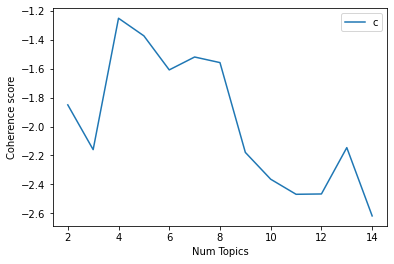

In [26]:
# Show graph
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -1.8506
Num Topics = 3  has Coherence Value of -2.1597
Num Topics = 4  has Coherence Value of -1.2525
Num Topics = 5  has Coherence Value of -1.3741
Num Topics = 6  has Coherence Value of -1.6092
Num Topics = 7  has Coherence Value of -1.5201
Num Topics = 8  has Coherence Value of -1.5588
Num Topics = 9  has Coherence Value of -2.1789
Num Topics = 10  has Coherence Value of -2.364
Num Topics = 11  has Coherence Value of -2.4681
Num Topics = 12  has Coherence Value of -2.4658
Num Topics = 13  has Coherence Value of -2.1458
Num Topics = 14  has Coherence Value of -2.6174


In [39]:
best_at = coherence_values.index(max(coherence_values)) + 2
print('The peak at k={}, the Coherence Value = {}'. format(best_at, max(coherence_values)))


The peak at k=4, the Coherence Value = -1.252494182666128


In [27]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.018*"the" + 0.016*"electr" + 0.015*"magnet" + 0.014*"current" + 0.012*"A" '
  '+ 0.008*"one" + 0.007*"batteri" + 0.007*"circuit" + 0.007*"It" + '
  '0.007*"resist"'),
 (1,
  '0.016*"state" + 0.014*"u.s." + 0.013*"the" + 0.007*"court" + 0.007*"would" '
  '+ 0.006*"power" + 0.006*"govern" + 0.006*"law" + 0.006*"may" + '
  '0.005*"unit"'),
 (2,
  '0.009*"the" + 0.008*"one" + 0.007*"gener" + 0.006*"would" + 0.006*"may" + '
  '0.006*"It" + 0.005*"law" + 0.005*"case" + 0.005*"but" + 0.004*"natur"'),
 (3,
  '0.013*"one" + 0.012*"boil" + 0.011*"water" + 0.010*"put" + 0.009*"two" + '
  '0.009*"egg" + 0.008*"butter" + 0.008*"sugar" + 0.007*"add" + 0.007*"half"')]


In [28]:
corpus_opt = optimal_model[corpus]

In [40]:
##fill value 0 in vector
X = np.zeros(shape=(1400,best_at))
for i, row in enumerate(optimal_model[corpus]):
  for  j, (topic_num, prop_topic) in enumerate(row):
    X[i, topic_num] = prop_topic



In [41]:
print(X)


[[0.         0.         0.99924773 0.        ]
 [0.         0.06091252 0.93867868 0.        ]
 [0.         0.99915099 0.         0.        ]
 ...
 [0.         0.         0.         0.99902564]
 [0.         0.         0.         0.99902564]
 [0.         0.         0.         0.99902564]]


In [30]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

    return(sent_topics_df)



In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7122,"one, the, bee, would, It, may, but, man, hive,...","[act, known, circumst, harm, may, accept, gene..."
1,1,0.0,0.8263,"the, state, u.s., would, may, one, gener, case...","[aris, whether, represent, part, contract, If,..."
2,2,1.0,0.9990,"one, the, bee, would, It, may, but, man, hive,...","[section, cite, godbolt, see, F., N., B, G, fi..."
3,3,1.0,0.9990,"one, the, bee, would, It, may, but, man, hive,...","[row, bell, c.c, see, treasur, hidden, anoth, ..."
4,4,1.0,0.5937,"one, the, bee, would, It, may, but, man, hive,...","[give, trespass, pretti, nearli, thing, action..."
5,5,0.0,0.9992,"the, state, u.s., would, may, one, gener, case...","[condit, true, effect, upon, promis, attach, w..."
6,6,1.0,0.6070,"one, the, bee, would, It, may, but, man, hive,...","[land, think, intend, act, consequ, complain, ..."
7,7,1.0,0.5403,"one, the, bee, would, It, may, but, man, hive,...","[the, law, wait, properti, use, destroy, hand,..."
8,8,0.0,0.9992,"the, state, u.s., would, may, one, gener, case...","[for, said, far, one, term, contract, thing, p..."
9,9,0.0,0.7142,"the, state, u.s., would, may, one, gener, case...","[crime, malum, se, If, gener, ground, punish, ..."


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.040431  0.021199       1        1  26.309516
3      0.095081  0.078444       2        1  20.511778
4      0.075388 -0.119760       3        1  16.190223
5      0.010799 -0.140831       4        1  15.432284
1     -0.284794  0.022770       5        1  14.962540
0      0.063094  0.138179       6        1   6.593659, topic_info=         Term         Freq        Total Category  logprob  loglift
4183     u.s.   689.000000   689.000000  Default  30.0000  30.0000
167     state  1091.000000  1091.000000  Default  29.0000  29.0000
8737   magnet   444.000000   444.000000  Default  28.0000  28.0000
4705   electr   483.000000   483.000000  Default  27.0000  27.0000
4142  current   413.000000   413.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
353     could    35.639824   362.267242   Topic6  -5.9623   0.4001
6         act    34.253176   416.306140   Topic6  -6.0020   0.2214
336     would    35.614042  1023.354701   Topic6  -5.9631  -0.6390
69        may    34.214134  1151.501398   Topic6  -6.0032  -0.7971
50      first    27.335401   542.271109   Topic6  -6.2276  -0.2685

[470 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
418        1  0.161653     A
418        2  0.157244     A
418        3  0.035270     A
418        4  0.539332     A
418        5  0.085235     A
...      ...       ...   ...
3427       4  0.015597  york
3427       5  0.015597  york
3427       6  0.467919  york
10334      2  0.019816  zinc
10334      4  0.951176  zinc

[1423 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 6, 2, 1])